<a href="https://colab.research.google.com/github/ManasaChowdary06/Airbnb_EDA_Capstone/blob/main/Airbnb_Bookings_Analysis_individual_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

##  Importing the Libraries







In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

## Mount the Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# reading the csv file










In [3]:

wp = '/content/drive/MyDrive/AlmaBetter/Python/datasets/Airbnb NYC 2019.csv'
df_air = pd.read_csv(wp) 


In [ ]:
df_air.head(2) # displays the first 2 rows in the dataset

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [ ]:
df_air.tail() # displays the last 5 rows in the dataset

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [4]:
df_air.info() #provides the information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df_air.shape #gives out the number of rows and columns

(48895, 16)

In [ ]:
df_air.size #the size of the dataset i.e (rows*columns)

782320

## Data Observation and Cleaning


In [5]:
df_air.duplicated() # No duplicate values are present

0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Length: 48895, dtype: bool

The list below show the percentage of missing values for each column, sorted in descending order. Last_review, reviews_per_month have 20% of missing values and host_name, name have small percent of the missing values, and the remaining do not have any missing value.

last_review                       0.205583
reviews_per_month                 0.205583
host_name                         0.000429
name                              0.000327
id                                0.000000
host_id                           0.000000
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

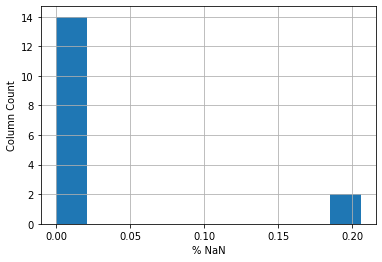

In [6]:
# plotting Nan distribution for the columns
nan_cols = (df_air.isnull().sum()/df_air.shape[0]).sort_values(ascending = False)
ax = nan_cols.hist()  
ax.set_xlabel("% NaN")
ax.set_ylabel("Column Count")
nan_cols.head(n=16)

The distribution of missing values for each row below shows that the majority of row entries is concentrated on the 0% bin, while there are some outliers near or above 12% bin.

Text(0, 0.5, 'Row Count')

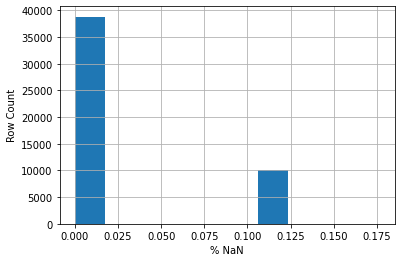

In [ ]:
# create a column to flag if the row contain any NaN value
df_air['has_NaN'] = (df_air.isnull().sum(axis = 1)/df_air.shape[1]) > 0
# plot NaN distribution for the rows/data points
nan_rows = (df_air.isnull().sum(axis = 1)/df_air.shape[1]).sort_values(ascending = False)
ax = nan_rows.hist()
ax.set_xlabel("% NaN")
ax.set_ylabel("Row Count")

In [ ]:
df_air.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
has_NaN                               0
dtype: int64

We can see that there are 4 columns containing null values which are name, host_name, last_reviews, reviews_per_month (obviously, if a listing has never received a review, its possible and valid). So we will just fillna(0) to those null values

In [ ]:
df_air['reviews_per_month'].fillna(0,inplace=True) #filling the Nan in the column 'reviews_per_month with '0' as this column might be useful.

In [ ]:
df_air.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### ANALYSIS

In [8]:
df_manasa=df_air.copy()

1

# 1) To Exhibit the Relation between the neighbourhood group and minimum nights through Pie chart.


In [ ]:
# Counting the no of nights posted in each neighbourhood group.

neighbourhood_group_count = df_manasa.groupby('neighbourhood_group')['minimum_nights'].count().head()
neighbourhood_group_count


neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: minimum_nights, dtype: int64

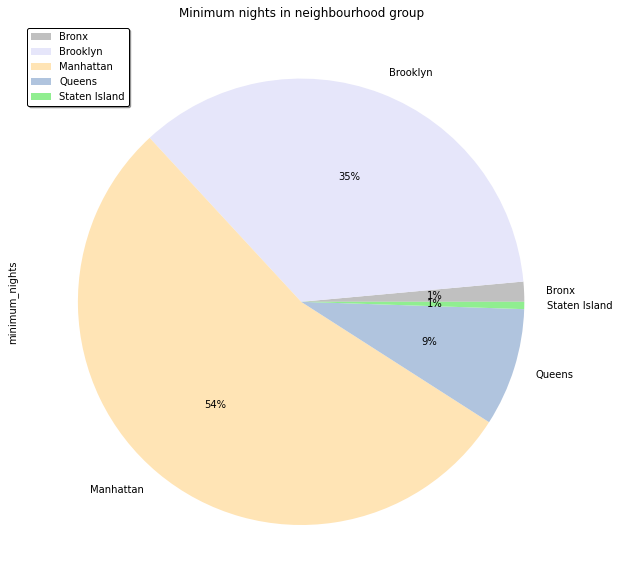

In [ ]:

#listing out the colours to be used in the piechart
colors_list = ['silver', 'lavender', 'moccasin', 'lightsteelblue', 'lightgreen']

df_manasa.groupby(['neighbourhood_group']).sum().plot(kind='pie',
                                            y='minimum_nights',autopct='%1.0f%%',
                                            title='Minimum nights in neighbourhood group',
                                            figsize=(10,20), colors = colors_list)

plt.legend(shadow = True, edgecolor = 'black', facecolor = 'white')
# Plotting pie chart.
plt.show()


## Inference

--> The minimum night stays are more in Manhattan than the other four parts...This is because Manhattan has highest night establishments than the remaining(source: Internet) and that's why the youngsters or people who are partygoers would plan for night stays.




--> we can also say that as the night stays are relatively more in Manhattan, the availability to rent for a night would be probably less and hence we can say that the prices also would be higher.


2

#2)Total number of nights spent in each room type

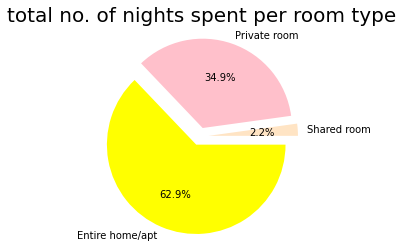

In [10]:
#  unique value of room types
list(df_manasa['room_type'].unique())
['Private room', 'Entire home/apt', 'Shared room']

#   the maximum(minimum nights) spent by customer across different room type
total_room=df_manasa.groupby(  'room_type')['minimum_nights'].sum().reset_index()
room_types=total_room.sort_values('minimum_nights',ascending=True)
room_types.head()

labels=list(room_types['room_type'])
sizes=list(room_types['minimum_nights'])

# create color parameter
colors=['bisque','pink','yellow']
# create explode
explode = (0.1, 0.1, 0.1)
#creating pie chart
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('total no. of nights spent per room type', fontsize=20)
plt.axis("equal")  

plt.show()

INFERENCE

More number of nights are spent in entire home/apt followed by private room and then least is shared room.

3


# 3)To depict the relation between price and reviews

(0.0, 10.0)

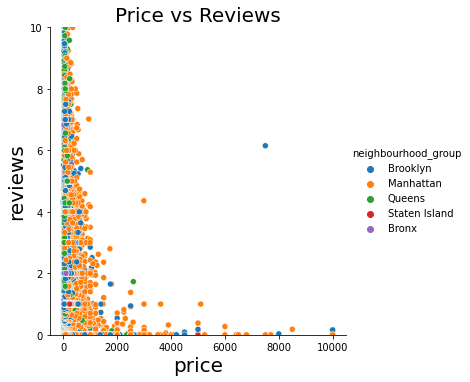

In [ ]:
#to plot the relative plot
sns.relplot(x="price", y="reviews_per_month",data = df_manasa,hue='neighbourhood_group',kind='scatter');

#title of the plot
plt.title('Price vs Reviews', fontsize = 20)
#declaring the xlabel
plt.xlabel('price', fontsize = 20)
#declaring the ylabel
plt.ylabel('reviews', fontsize = 20)
plt.ylim([0, 10])


INFERENCE

 1. This relative plot depicts that, as the price increases the number of reviews 
are less which we can assume that the people are preferring to rent those with less price and hence around the range of upto 4000, there are more reviews...although we can observe that there are few outliers.









2. Also, from the graph the neighbourhood group 'Manhattan' have more number of reviews and hence we can say that in New York City, among the 5, Manhattan has more number of Airbnb bookings.

4

from the below observation, we can say that the host with '244361589' id with Manhattan as its neighbourhood group has more number of reviews per month.

In [ ]:
df_manasa.sort_values('reviews_per_month',ascending=False)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,has_NaN
42075,32678719,Enjoy great views of the City in our Deluxe Room!,244361589,Row NYC,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,2019-07-07,58.50,9,299,False
42076,32678720,Great Room in the heart of Times Square!,244361589,Row NYC,Manhattan,Theater District,40.75828,-73.98876,Private room,199,1,82,2019-07-07,27.95,9,299,False
38870,30423106,Lou's Palace-So much for so little,228415932,Louann,Queens,Rosedale,40.65417,-73.74158,Private room,45,1,37,2019-07-08,20.94,1,134,False
27287,21550302,JFK Comfort.5 Mins from JFK Private Bedroom & ...,156684502,Nalicia,Queens,Springfield Gardens,40.66110,-73.76830,Private room,80,1,403,2019-07-06,19.75,3,26,False
28651,22176831,JFK 2 Comfort 5 Mins from JFK Private Bedroom,156684502,Nalicia,Queens,Springfield Gardens,40.66158,-73.77050,Private room,50,1,341,2019-07-08,17.82,3,25,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14459,11359913,Gramercy Townhouse,53356372,Brenda,Manhattan,Gramercy,40.73546,-73.98057,Entire home/apt,1200,2,0,NaN,0.00,1,0,True
14451,11344203,"Cozy lofted room, with patio",26082446,Natali,Brooklyn,Bushwick,40.69607,-73.92295,Private room,100,1,0,NaN,0.00,1,0,True
14449,11341650,"Room off Jefferson L, Bushwick",978580,Marta,Brooklyn,Bushwick,40.70515,-73.92500,Private room,75,1,0,NaN,0.00,1,0,True
14445,11337913,Private Bedroom Midtown,3660628,Michelle,Manhattan,Upper West Side,40.76898,-73.98453,Private room,105,4,0,NaN,0.00,1,0,True


5

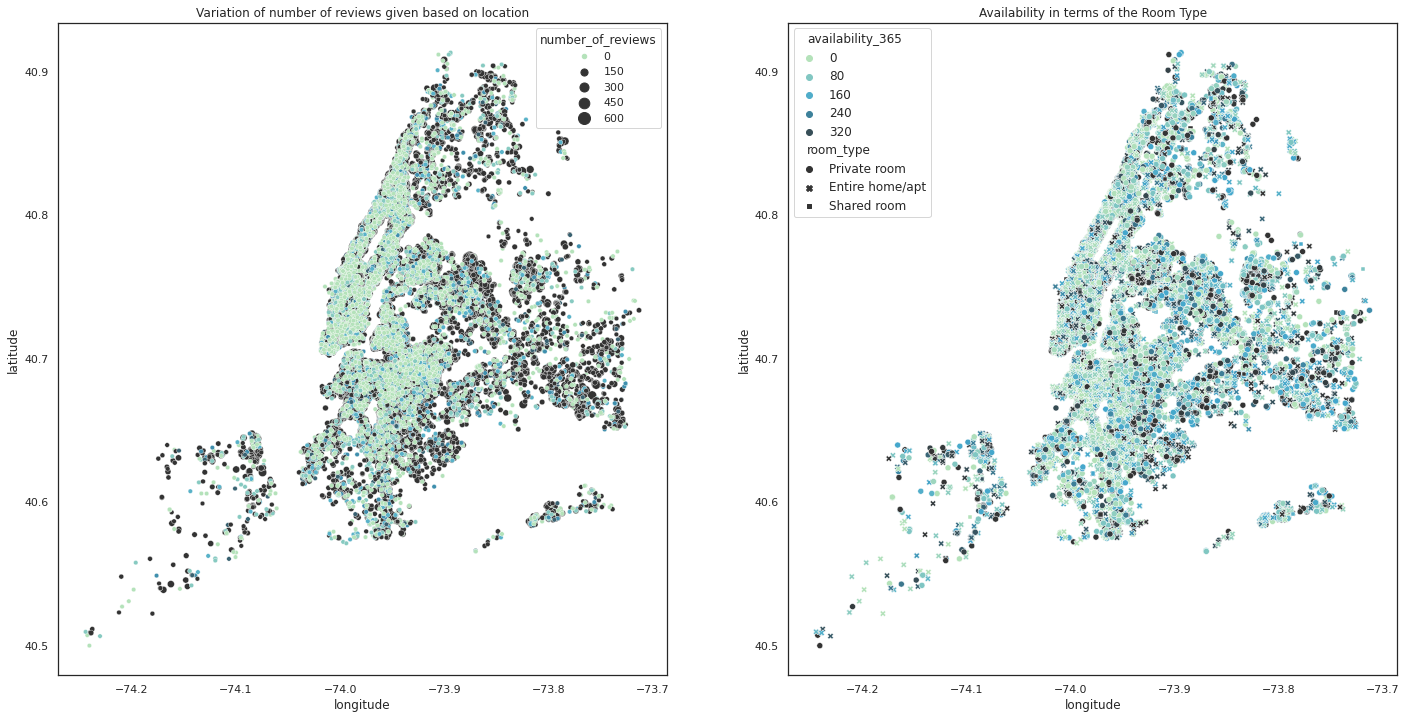

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 12))
ax = axes.flatten()
#setting the theme colour to white
sns.set_theme(style="white")

#first subplot is variation of number of reviews based on the location
sns.scatterplot(data=df_manasa, x='longitude', y='latitude', hue='number_of_reviews', size="number_of_reviews", sizes=(20, 150), palette='GnBu_d', hue_norm=(0, 5), ax=ax[0])
ax[0].set_title('Variation of number of reviews given based on location')

#second subplot is availabilty in terms of room type
sns.scatterplot(data=df_manasa, x='longitude', y='latitude', hue='availability_365', style="room_type", palette='GnBu_d', ax=ax[1])
ax[1].set_title('Availability in terms of the Room Type')

#plotting the graph
plt.show()

 INFERENCE 


*   In the first plot, we can see a trend in rise of the review count throughout the outskirts of the city.


*   In the second plot, we've tried to visualize the availability in terms of room type. Though availability based on room type is spreaded well, still we can follow a pattern where the heart of new york(Manhattan) stays the busiest or booked for most of the time. Also, Most visitors don't prefer shared rooms, they tend to visit private room or entire home.







6

# 6) To find out the top 10 host names and their average availability





In [ ]:
#count of the hosts
df_manasa['host_name'].count()

48874

finding out the top 10 hosts from below code




In [ ]:
# Top 10 host names interms of count of host listings.

column_sorted = df_manasa.sort_values(by = ['calculated_host_listings_count'], ascending=False)
column_sorted.drop_duplicates(subset = ['calculated_host_listings_count'], inplace = True)
new_df_h = column_sorted.loc[:, ['host_name', 'calculated_host_listings_count']].head(10)

top_10 = new_df_h['host_name'].to_list()
print(top_10)


['Sonder (NYC)', 'Blueground', 'Kara', 'Kazuya', 'Sonder', 'Corporate Housing', 'Ken', 'Pranjal', 'Mike', 'Stanley']


finding out the average of the available days of these top 10 hosts





In [ ]:
# average availability of top 10 host listings.

list_ = []

for name in top_10:
    
    ll = df_manasa[df_manasa['host_name'] == name]
    n = ll['availability_365'].count()
    total = ll['availability_365'].sum()
    avg = int(total / n)
    list_.append(avg)
    
print(list_)


[301, 253, 274, 196, 276, 241, 266, 338, 157, 301]


plotting out the graph with the above information





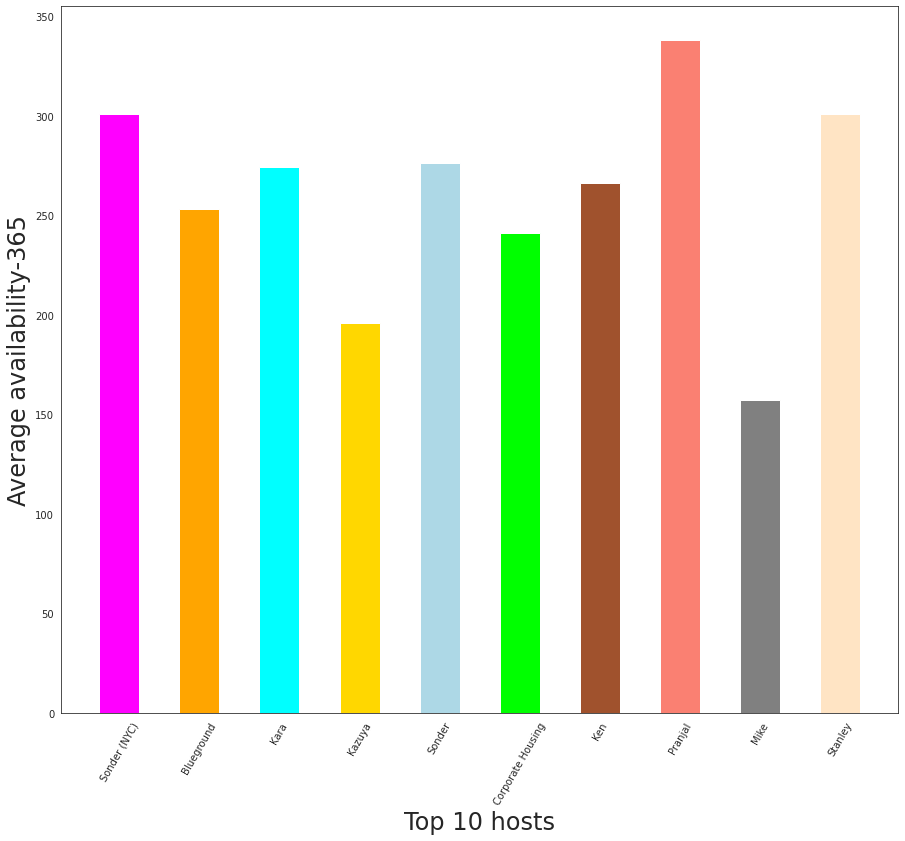

In [ ]:
# Plotting the box plot.

c = ['magenta', 'orange', 'aqua', 'gold', 'lightblue', 'lime', 'sienna', 'salmon', 'grey', 'bisque']

#Setting the figure size
plt.figure(figsize = (15, 13))

#Setting background colour of chart as white
sns.set_style('white')

diag=plt.bar(top_10, list_, color = c, width = 0.5)


# Naming X & Y axis
plt.xlabel('Top 10 hosts', fontsize = 24)
plt.ylabel('Average availability-365', fontsize = 24)

#Adjusting Bar labels
plt.xticks(rotation = 60)
plt.show()


# Inference

* From the graph plotted, it can be observed that the host 'Pranjal' has the highest availability followed by 'Sonder(NYC)' and 'Stanley' both having the same average availability

*   As these hosts are top 10, it can also be assumed that their services would be good and satisfactory according to the coustomer's needs, and hence people who travel frequently and need good services can prefer the hosts like: Pranjal, Sonder, Stanley as they are available 300 and above days.

*   The host-Mike, being one of the top host has the least number of average availability among the other top 10 hosts, So, he should consider maximizing the availability.